<div style=" background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Algorithme de détection automatique de faux billets
</h2>
</div>

## 1. CONTEXTE

Dans notre cas, le problème que nous allons explorer est la **classification binaire** (un échantillon ne peut être qu'une des deux choses).

Nous souhaitons mettre en place un algorithme capable de différencier
automatiquement les vrais des faux billets en euros, à partir de leurs
caractéristiques géométriques mesurées par une machine.
Ce projet s’inscrit dans une démarche de lutte contre la contrefaçon de billets.

En d'autres termes,

> **En se basant sur des paramètres concernant un billet, pouvons-nous prédire s'il est ou non un faux billet ?**

## 2. OBJECTIFS

Une machine mesure plusieurs dimensions sur chaque billet.
Au fil des années, des différences systématiques ont été détectées entre les vrais et
les faux billets, invisibles à l’œil nu, mais exploitables par un algorithme.
L’objectif est donc de construire un modèle capable, à partir de ces mesures
géométriques, de prédire si un billet est vrai ou faux.

> **Nous utilisons les variables indépendantes pour prédire notre variable dépendante.**


## 3. DONNEES

##### Caractéristiques disponibles :
Chaque billet est décrit par 6 variables géométriques :

- length : longueur du billet (en mm)
- height_left : hauteur à gauche (en mm)
- height_right : hauteur à droite (en mm)
- margin_up : marge entre le haut du billet et l’image (en mm)
- margin_low : marge entre le bas du billet et l’image (en mm)
- diagonal : diagonale du billet (en mm)

Un fichier d’exemple est fourni, contenant :
- 1 500 billets  
 o 1 000 vrais  
 o 500 faux
- Une colonne spécifie la nature (vrai ou faux)






In [1]:
# importons nos librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1. Analyse Exploratoire des données</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Chargement et aperçu des données </h3>
</div>

In [2]:
df = pd.read_csv('billets.csv', sep =";") 
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [4]:
df.shape

(1500, 7)

> **Notre DataFrame est composé de 1500 lignes et 7 colonnes**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


In [7]:
df['is_genuine'].value_counts()

is_genuine
True     1000
False     500
Name: count, dtype: int64

> **Notre Target est composé de 1000 vrais billets et de 500 faux billets**

In [8]:
df.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Visualisations </h3>
</div>

<Axes: xlabel='is_genuine'>

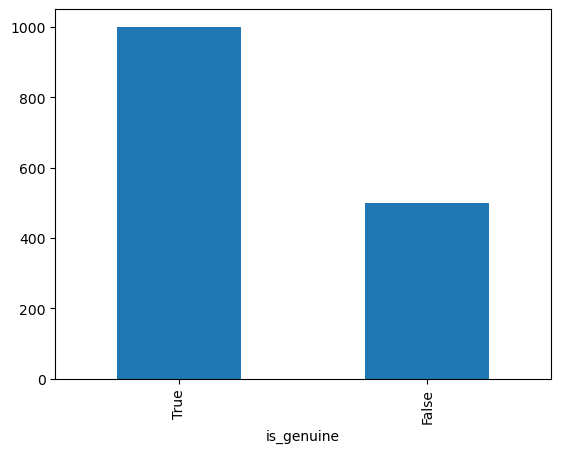

In [9]:
df.is_genuine.value_counts().plot(kind= "bar")

> **Notre diagramme en barres montre la répartition entre les vrais et les faux billets de nos données**

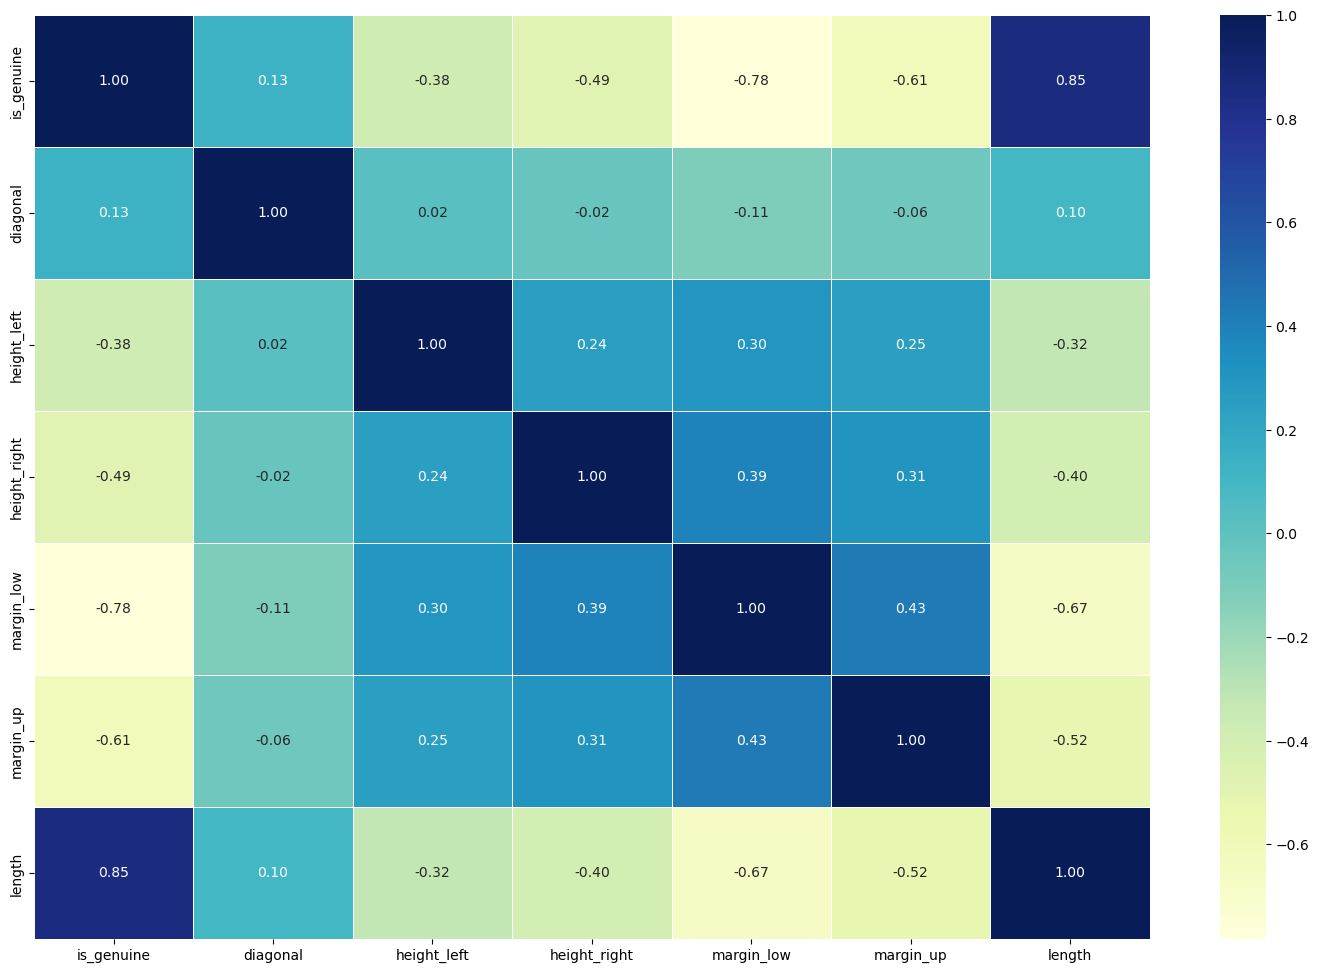

In [10]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= ".2f", cmap="YlGnBu");

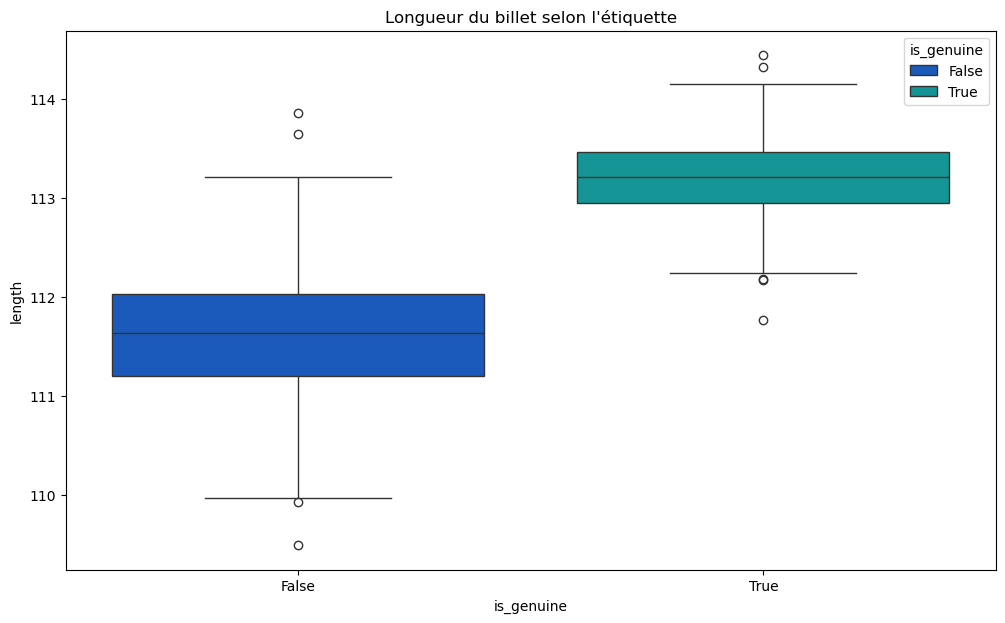

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'is_genuine', hue = 'is_genuine', y = 'length', data=df, palette ='winter')
plt.title('Longueur du billet selon l\'étiquette')
plt.show()

>**Dans cette visualisation nous constatons une médiane nettement plus basse pour les faux billets**  
 **C’est un signe de différenciation claire entre les billets: les faux billets sont plus courts en moyenne.**

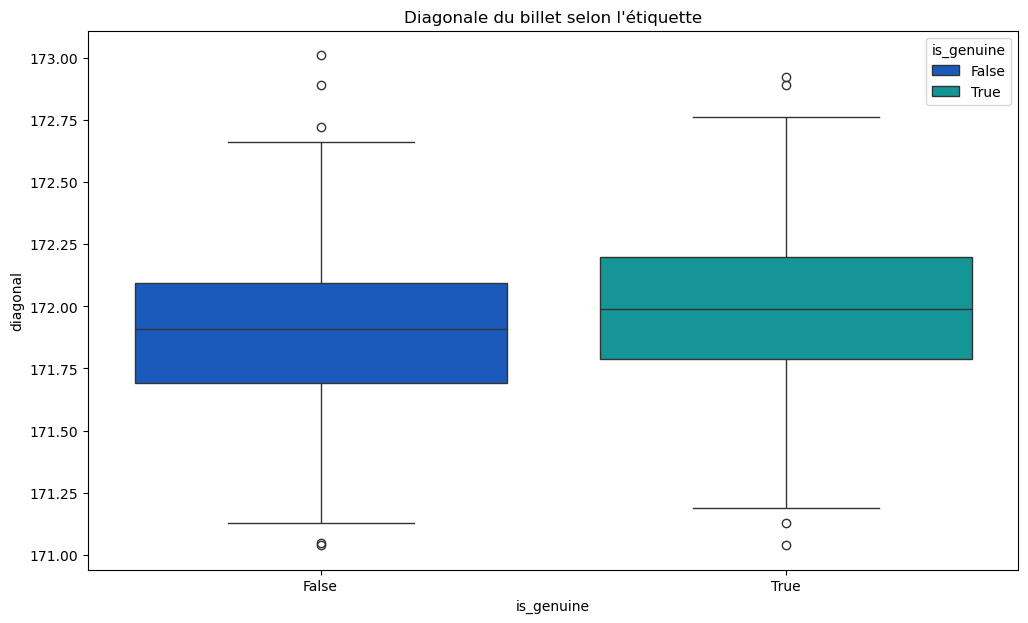

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'is_genuine', hue = 'is_genuine', y = 'diagonal', data=df, palette ='winter')
plt.title('Diagonale du billet selon l\'étiquette')
plt.show()

> **Dans cette visualisation, on observe une médiane légèrement plus élevée pour les vrais billets.**  
**Les différences sont faibles, donc la diagonale ne permet pas de distinguer clairement les vrais des faux billets à elle seule.**

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.3 Data Cleaning</h3>
</div>

In [13]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


### Identification des valeurs manquantes

In [14]:
# identifions les valeurs manquantes
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

> **Nous remarquons des valeurs manquantes au niveau de la colonne margin_low**

### Gestion des valeurs manquantes

> **Nous souhaitons compléter les données manquantes au lieu de simplement les supprimer. Une façon d’y parvenir consiste à faire une imputation.
Cependant, nous devons distinguer les faux des vrais billets et le margin low peut y contribuer donc il est plus prudent de faire une imputation selon le target.**

In [15]:
# Visualisons margin_low : marge entre le bas du billet et l’image (en mm) selon le target
import plotly.express as px
fig = px.box(df, x = 'is_genuine', y ='margin_low', color = 'is_genuine', color_discrete_sequence= px.colors.sequential.Viridis)
fig.update_layout(width=800, height= 500)
fig.show()

### Imputation des Nan

In [16]:
# Fonction d'imputation des Nan en fonction du type de billet
def imputation_Nan_Par_la_mediane (colonnes):
    margin_low = colonnes[0]
    is_genuine = colonnes [1]
    if pd.isnull(margin_low):
        if is_genuine == True:
            return 4.11
        else:  
            return 5.19
    else:
        return margin_low

In [17]:
# Appel de la fonction
df['margin_low'] = df[['margin_low','is_genuine']].apply(imputation_Nan_Par_la_mediane, axis=1)

C:\Users\nouss\AppData\Local\Temp\ipykernel_6740\1625979112.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nouss\AppData\Local\Temp\ipykernel_6740\1625979112.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [18]:
# Verification
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

> **A présent notre dataframe est clean on peut passer à la modélisation**

In [19]:
# importons labelEncoder pour la conversion de nos données
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

# Nous allons convertir notre target en variable numérique
df['is_genuine']=label_encoder.fit_transform(df['is_genuine'])

In [20]:
# verification
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [21]:
df.is_genuine.value_counts()

is_genuine
1    1000
0     500
Name: count, dtype: int64

> **Aprés l'encodage:**  
> **1** : représente les vrais billets  
> **0** : représente les faux billets

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2. MODELISATION</h2>
</div>

In [22]:
# Définissons nos variables dépendantes et indépendantes
X= df.drop(columns=['is_genuine'])
y= df.is_genuine

In [23]:
# Verification
print(X.shape)
print(y.shape)

(1500, 6)
(1500,)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 Entrainement des modéles</h3>
</div>

- **Normalisons nos données**

In [24]:
# Normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

- **Commençons par diviser nos données en un ensemble d'entrainement et de test.**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

- **Importons nos modéles**

In [26]:
# Importons nous algorithmes
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

- **Entrainons nos modéles**

In [27]:
# Créons un dictionnaire de données
models={"Regression Logistique":LogisticRegression(), "KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

#Créons notre fonction
def fit_score (models,X_train, y_train, X_test, y_test):
    models_score={}

    for nom,model in models.items():
        model.fit(X_train, y_train)
        models_score[nom]= round(model.score(X_test, y_test),3)
    return models_score

# appel de la fonction
models_score = fit_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
models_score

{'Regression Logistique': 0.993, 'KNN': 0.987, 'Random Forest': 0.99}

In [28]:
# Entraînement KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Prédiction des clusters
clusters = kmeans.predict(X_test)

# Evaluons notre modèle avec la métrique silhouette
from sklearn.metrics import silhouette_score
score= round(silhouette_score(X_test,clusters),2)
print('Silhouette Score = ',score)

C:\Users\nouss\anaconda3\envs\tf310\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



Silhouette Score =  0.34


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 Prediction et comparaison des modéles</h3>
</div>

### KMEANS

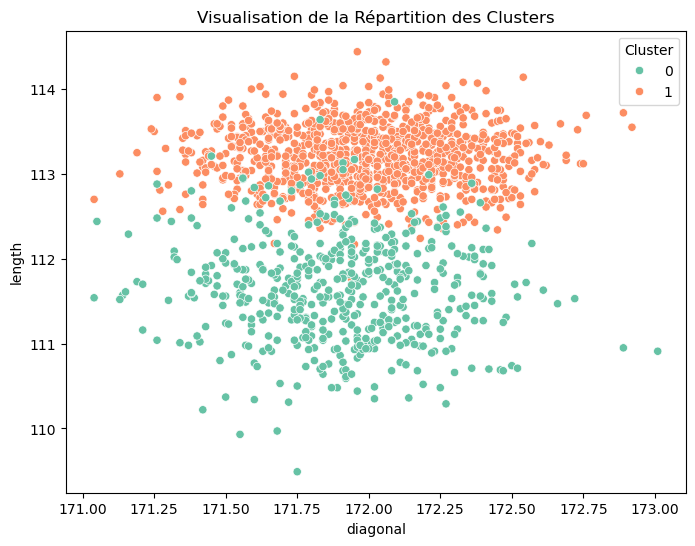

In [29]:
# Visualisons les résultats de notre prédiction
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='diagonal', y='length', hue= 'is_genuine', palette= 'Set2')
plt.title('Visualisation de la Répartition des Clusters')
plt.legend(title='Cluster')
plt.show()

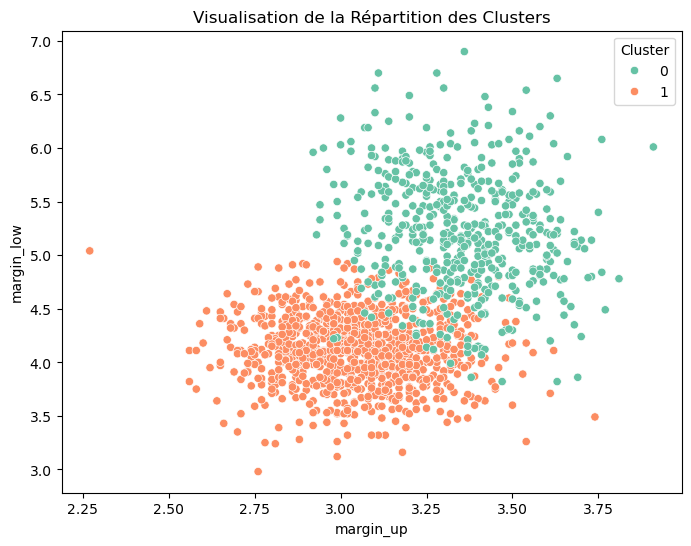

In [30]:
# Visualisons les résultats de notre prédiction
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='margin_up', y='margin_low', hue= 'is_genuine', palette= 'Set2')
plt.title('Visualisation de la Répartition des Clusters')
plt.legend(title='Cluster')
plt.show()

### LOGISTIC REGRESSION

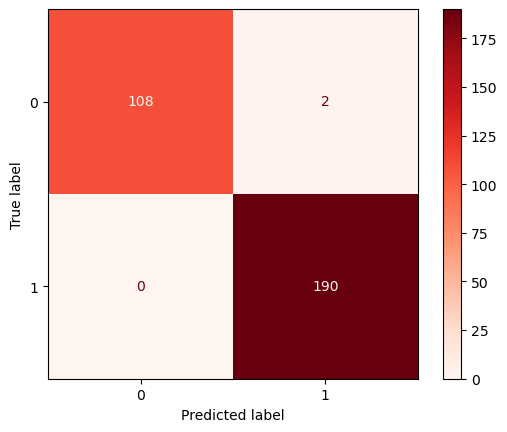

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
cm_display = ConfusionMatrixDisplay(conf_matrix).plot(cmap="Reds")

> **Pour rappel**  
> **1** : représente les vrais billets  
> **0** : représente les faux billets  
> **108 faux billets** ont été correctement prédits  
> **190 vrais billets** ont été correctement prédits  
> Notre modéle a prédit **2 faux billets comme étant de vrais billets**  
> 0 vrai billet a été prédit comme étant un faux

### KNEIGHBORS CLASSIFIER 

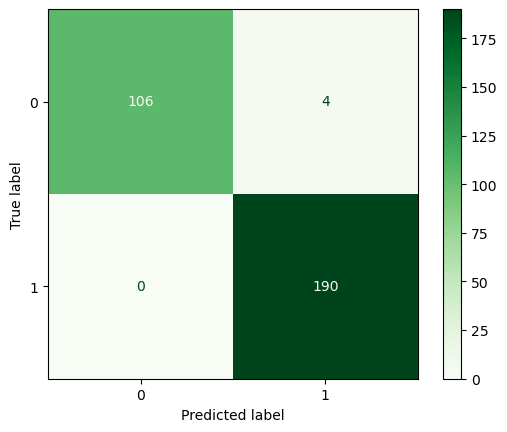

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
cm_display = ConfusionMatrixDisplay(conf_matrix).plot(cmap="Greens")

> **106 faux billets** ont été correctement prédits  
> **190 vrais billets** ont été correctement prédits  
> Notre modéle a prédit **4 faux billets comme étant de vrais billets**  
> 0 vrai billet a été prédit comme étant un faux

### RANDOM FOREST CLASSIFIER

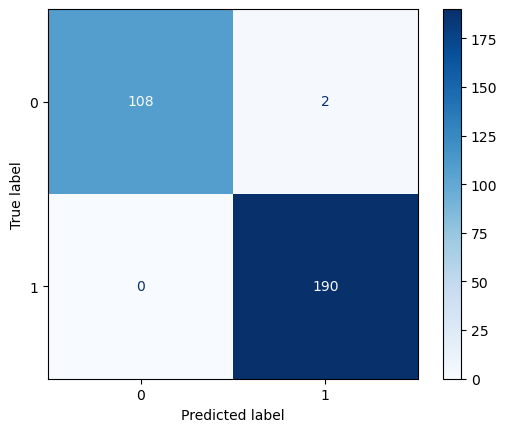

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")

> **108 faux billets** ont été correctement prédits  
> **190 vrais billets** ont été correctement prédits  
> Notre modéle a prédit **2 faux billets comme étant de vrais billets**  
> 0 vrai billet a été prédit comme étant un faux

### COMPARAISON DES MODELES

> **Après analyse des matrices de confusion et des scores d'accuracy, les modèles Régression Logistique et Random Forest présentent le même nombre d’erreurs 2 faux négatifs: cela signifie qu’ils ont prédit 2 faux billets comme étant vrais, ce qui représente un risque en matière de sécurité.
Toutefois, en comparant leurs performances globales, la Régression Logistique se démarque légèrement avec une accuracy de 0.993, contre 0.990 pour Random Forest.  
Elle constitue donc, à ce stade, le modèle le plus performant et le plus fiable pour détecter les faux billets.**

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.3 Sauvegarde du modèle</h3>
</div>

In [34]:
import joblib 
model_filename='model_RegressionLogistic.sav'
joblib.dump(lr, model_filename)

['model_RegressionLogistic.sav']

In [35]:
# Enregistrement du scaler ajusté
scaler_filename='standard_scaler.sav'
joblib.dump(sc, scaler_filename)

['standard_scaler.sav']

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3. PREDICTION SUR DE NOUVELLES DONNEES</h2>
</div>

In [36]:
df1=pd.read_csv('faux_billets.csv', sep=";")
df1.head(20)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,172.47,104.07,104.02,4.04,3.25,113.45
1,171.83,104.14,103.62,3.16,3.18,113.22
2,171.84,104.59,104.00,3.88,3.27,113.08
3,171.89,103.89,103.40,4.11,2.96,113.24
4,172.20,104.35,103.67,4.44,3.38,113.65
5,172.06,103.87,103.83,4.09,2.92,113.19
6,171.73,103.92,103.74,4.43,2.78,112.98
7,171.30,104.19,103.70,4.12,2.82,112.87
8,171.88,104.47,103.45,4.56,3.33,113.01
9,172.47,103.89,104.14,3.74,3.28,113.47


In [37]:
df1.isna().sum()

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      500 non-null    float64
 1   height_left   500 non-null    float64
 2   height_right  500 non-null    float64
 3   margin_low    500 non-null    float64
 4   margin_up     500 non-null    float64
 5   length        500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


In [39]:
model_path = "model_RegressionLogistic.sav"
scaler_path= "standard_scaler.sav"

model= joblib.load(model_path)
scaler= joblib.load(scaler_path)

In [40]:
x_test= scaler.fit_transform(df1)

In [41]:
y_pred = model.predict(x_test)

In [42]:
# Mettons nos résultats sur un nouveau DataFrame
df1["prediction"] = y_pred
df1.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction
0,172.47,104.07,104.02,4.04,3.25,113.45,1
1,171.83,104.14,103.62,3.16,3.18,113.22,1
2,171.84,104.59,104.00,3.88,3.27,113.08,0
3,171.89,103.89,103.40,4.11,2.96,113.24,1
4,172.20,104.35,103.67,4.44,3.38,113.65,1


In [43]:
df1["prediction"].value_counts()

prediction
1    324
0    176
Name: count, dtype: int64

> **Notre modéle a prédit sur 500 billets:**     
>**- 324 vrais billets**     
>**- 176 faux billets**

<div style="border: 1px solid RGB(0,150,250);" >
<h1 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">_________________________________________FIN_____________________________________________</h1>
</div>